In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [32]:
from plot_utils import *

In [165]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [34]:
from diffusion_utils import *

In [35]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# Load 

In [46]:
params_list=[
({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.5,0.5,1),'p_proj':np.linspace(0.0,0.9,10),'s':np.arange(10000),'L':np.arange(20,61,10)}),
# ({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.4,0.6,21),'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(10000),'L':np.arange(20,61,10)}),
]

In [172]:
for fixed_params,vary_params in params_list:
    data_MPS_0_DW_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_DW.json',
        fn_dir_template='/home/jake/Data/Metrics/',
        # fn_dir_template='/home/jake/Data/Metrics/MPS_{nu}-{de}_DW/',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        # data_dict={'fn':set()},
        data_dict_file='xj({nu},{de})_DW_proj.pickle', 
        # data_dict_file='xj({nu},{de})_DW.json', 
        zip_fn='/home/jake/Data/Metrics/MPS_0-1_DW.zip'

    )
df_MPS_0_DW=convert_pd(data_MPS_0_DW_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

Creating new data_dict /home/jake/Data/Metrics/xj(0,1)_DW_proj.pickle


generate_params: 100%|██████████| 500000/500000 [03:22<00:00, 2465.92it/s]


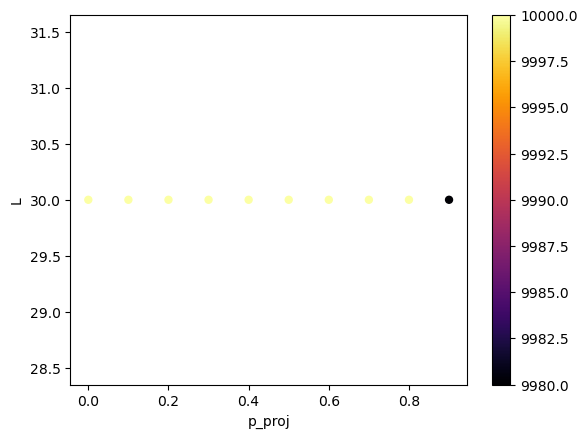

In [173]:
visualize_dataset(df_MPS_0_DW,params={'Metrics':'DW1','T':0,'p_ctrl':0.5},xlabel='p_proj',ylabel='L')

In [14]:
data_MPS_0_T_dict.keys()

dict_keys(['fn', ('EE', 0.5, 30, 0.0), ('O', 0.5, 30, 0.0), ('EE', 0.5, 30, 0.1), ('O', 0.5, 30, 0.1), ('EE', 0.5, 30, 0.2), ('O', 0.5, 30, 0.2), ('EE', 0.5, 30, 0.3), ('O', 0.5, 30, 0.3), ('EE', 0.5, 30, 0.4), ('O', 0.5, 30, 0.4), ('EE', 0.5, 30, 0.5), ('O', 0.5, 30, 0.5), ('EE', 0.5, 30, 0.6), ('O', 0.5, 30, 0.6), ('EE', 0.5, 30, 0.7), ('O', 0.5, 30, 0.7), ('EE', 0.5, 30, 0.8), ('O', 0.5, 30, 0.8), ('EE', 0.5, 30, 0.9), ('O', 0.5, 30, 0.9)])

In [167]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_T.json',
        fn_dir_template='/home/jake/Data/Metrics/',
        # fn_dir_template='Data/Metrics/MPS_{nu}-{de}_T_bak/',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        # data_dict={'fn':set()},
        data_dict_file='xj({nu},{de})_T_proj_0.pickle', 
        zip_fn='/home/jake/Data/Metrics/MPS_0-1_T.zip'
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

Loading data_dict /home/jake/Data/Metrics/xj(0,1)_T_proj_0.pickle


generate_params: 100%|██████████| 500000/500000 [00:13<00:00, 37376.91it/s]


In [ ]:
(data_MPS_0_T_dict['fn'])

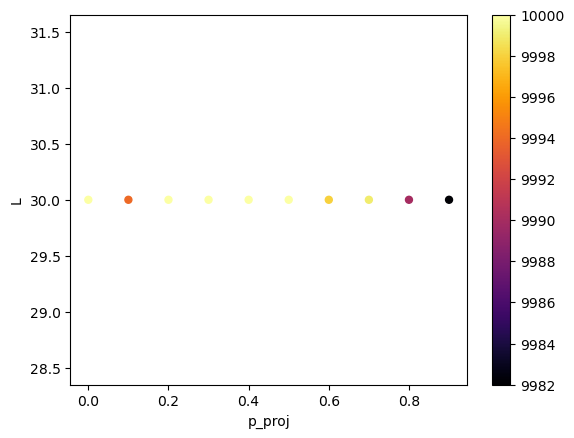

In [49]:
visualize_dataset(df_MPS_0_T,params={'Metrics':'EE','T':0,'p_ctrl':0.5},xlabel='p_proj',ylabel='L')

# Plot

Text(0.5, 0, '$\\sqrt{t/L^{2.00}}$')

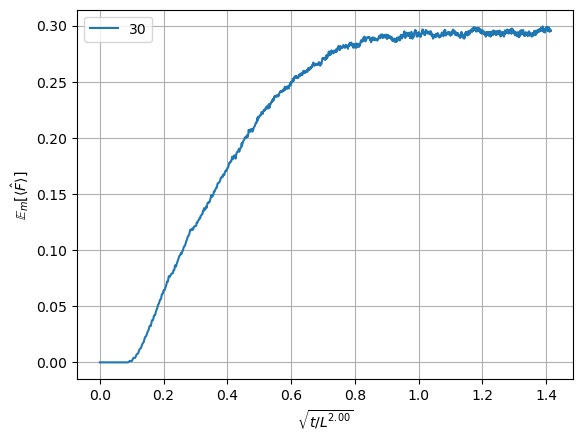

In [58]:
# L_list=np.arange(20,61,10)
L_list=[30,]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_MPS_0_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')

In [212]:
df_minimal=df_MPS_0_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.50).xs(level='L',key=30)
z=2
tL={}
EE_mean={}
p_proj_list=np.round(np.linspace(0.0,0.9,10),2)

for p_proj in p_proj_list:
    data=df_minimal.xs(level='p_proj',key=p_proj)['observations']
    t_list=data.index
    data=np.vstack((data).values)
    EE_mean[p_proj]=data.mean(axis=1)
    tL[p_proj]=np.sqrt(t_list/L**z)

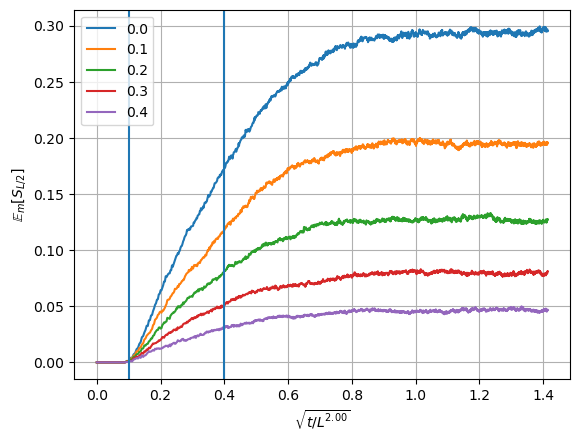

In [123]:
fig,ax=plt.subplots()

for p_proj in p_proj_list[:5]:
    ax.plot(tL[p_proj],EE_mean[p_proj],label=p_proj)
ax.legend()
ax.grid('on')
ax.set_ylabel(r'$\mathbb{E}_m[S_{L/2}]$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')
ax.axvline(x=0.1)
ax.axvline(x=0.4)

In [217]:
tL_small

Float64Index([0.10540925533894598, 0.11055415967851333, 0.11547005383792516,
               0.1201850425154663, 0.12472191289246472, 0.12909944487358055,
              0.13333333333333333, 0.13743685418725535,  0.1414213562373095,
               0.1452966314513558,
              ...
               0.3858612300930075,  0.3872983346207417,    0.38873012632302,
              0.39015666369065416, 0.39157800414902433,  0.3929942040850532,
              0.39440531887330776, 0.39581140290126393, 0.39721250959376614,
              0.39860869143671324],
             dtype='float64', name='T', length=134)

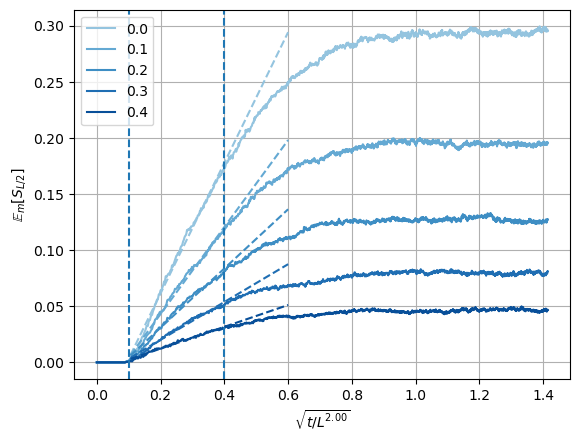

In [218]:
fig,ax=plt.subplots()
colormap = (plt.cm.Blues(0.4+0.6*(i/5)) for i in range(5))
for p_proj in p_proj_list[:5]:
    color=next(colormap)
    ax.plot(tL[p_proj],EE_mean[p_proj],label=p_proj,color=color)
    tL_small, EE_mean_small, res=fit_slope(tL,EE_mean,p_proj)
    tL_small=np.linspace(tL_small[0],.6)
    ax.plot(tL_small,res.slope*tL_small+res.intercept,'--',color=color)
ax.legend()
ax.grid('on')
ax.set_ylabel(r'$\mathbb{E}_m[S_{L/2}]$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')
ax.axvline(x=0.1,ls='dashed')
ax.axvline(x=0.4,ls='dashed')

## Extract "Diffusion Constant" $S\sim D \sqrt{t}/L$

In [114]:
from scipy.stats import linregress

In [183]:
def fit_slope(tL,EE_mean,p_proj,max_=0.4,min_=0.1):
    mask=(tL[p_proj]<max_) & (min_<tL[p_proj])
    tL_small=tL[p_proj][mask]
    EE_mean_small=EE_mean[p_proj][mask]
    res=linregress(tL_small,EE_mean_small)
    return tL_small, EE_mean_small, res

In [144]:
res

LinregressResult(slope=0.5813730809453621, intercept=-0.05477320876383544, rvalue=0.997168678460135, pvalue=3.167404403335404e-150, stderr=0.0038159378642954335, intercept_stderr=0.0011125275060212692)

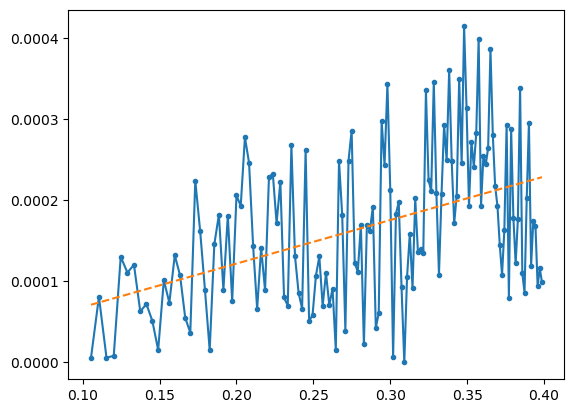

In [159]:
p_proj=p_proj_list[9]
tL_small, EE_mean_small, res=fit_slope(tL,EE_mean,p_proj)
plt.plot(tL_small,EE_mean_small,'.-')
plt.plot(tL_small,res.slope*tL_small+res.intercept,'--')

In [160]:
EE_D=[fit_slope(tL,EE_mean,p_proj)[2].slope for p_proj in p_proj_list]

Text(0, 0.5, '$D$')

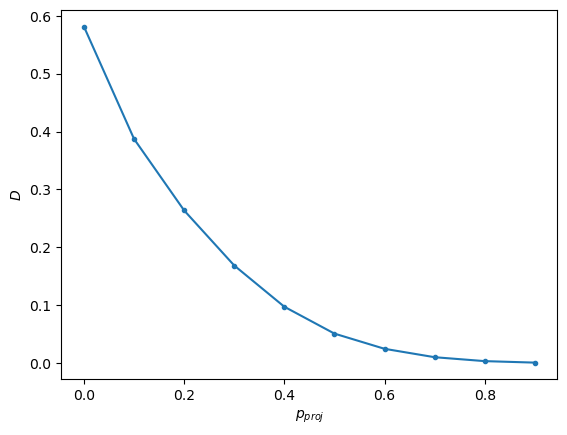

In [164]:
fig,ax=plt.subplots()
ax.plot(p_proj_list,EE_D,'.-')
ax.set_xlabel('$p_{proj}$')
ax.set_ylabel(r'$D$')

Text(0.5, 0, '$\\sqrt{t/L^{2.00}}$')

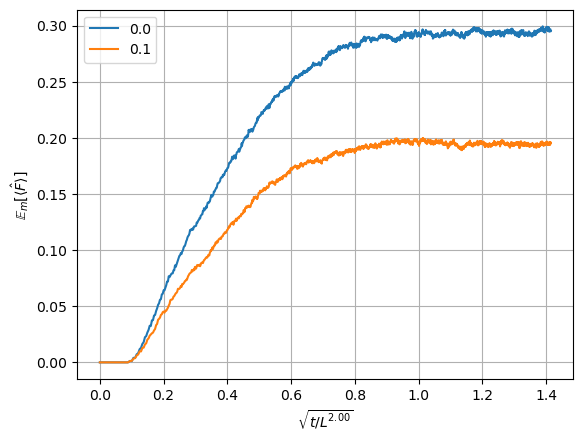

In [77]:
fig,ax=plt.subplots()
z=2

df_minimal=df_MPS_0_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.50).xs(level='L',key=30)
# for L in L_list:
for p_proj in p_proj_list[:2]:
    data=df_minimal.xs(level='p_proj',key=p_proj)['observations']
    t_list=data.index
    data=np.vstack((data).values)
    y=data.mean(axis=1)
    ax.plot(np.sqrt(t_list/L**z),y,label=p_proj)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')

## Satruate value vs p_proj

In [168]:
df_minimal=df_MPS_0_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.50).xs(level='L',key=30)

In [169]:
T_min,T_max=int(L**z),-1

sat_EE=[]
for p_proj in p_proj_list:
    data=df_minimal.xs(level='p_proj',key=p_proj)['observations']
    data=np.vstack((data).values)
    sat_EE.append(data[T_min:T_max,:].mean())

Text(0, 0.5, '$\\overline{S_{L/2}(t\\rightarrow\\infty)}$')

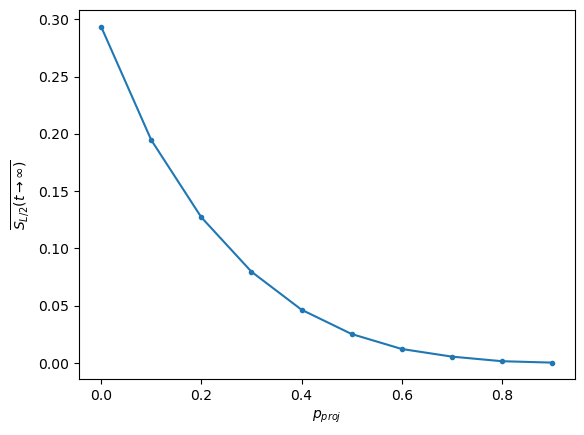

In [170]:
fig,ax=plt.subplots()
ax.plot(p_proj_list,sat_EE,'.-')
ax.set_xlabel('$p_{proj}$')
ax.set_ylabel(r'$\overline{S_{L/2}(t\rightarrow\infty)}$')

## Plot

Text(0.5, 0, '$\\sqrt{t/L^{2.00}}$')

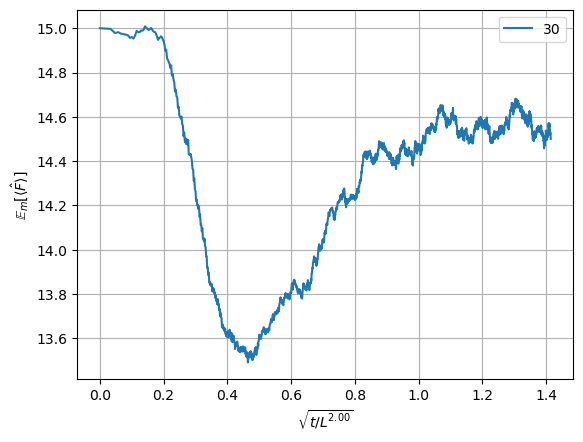

In [175]:
# L_list=np.arange(20,61,10)
L_list=[30,]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')

In [178]:
data2

T
0       [225.00000000000034, 225.00000000000034, 225.0...
1       [255.99999999999974, 195.99999999999966, 195.9...
2       [288.999999999999, 168.99999999999997, 168.999...
3       [256.0, 144.00000000000006, 195.99999999999966...
4       [225.00000000000034, 168.9999999999999, 169.00...
                              ...                        
1796    [658.3920089576463, 677.9889705151375, 3.06850...
1797    [608.1489295888729, 730.979772262956, 0.727926...
1798    [561.3241865245432, 785.9705740105795, 1.56460...
1799    [609.665964633369, 808.8780285837355, 5.020907...
1800    [660.0077427419611, 753.1826899865565, 10.2466...
Name: observations, Length: 1801, dtype: object

In [179]:
df_minimal_DW1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='L',key=30)
df_minimal_DW2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='L',key=30)
z=2
tL={}
mean_var_DW={}
p_proj_list=np.round(np.linspace(0.0,0.9,10),2)

for p_proj in p_proj_list:
    data1=df_minimal_DW1.xs(level='p_proj',key=p_proj)['observations']
    t_list=data1.index
    data1=np.vstack((data1).values)
    data2=df_minimal_DW2.xs(level='p_proj',key=p_proj)['observations']
    data2=np.vstack((data2).values)

    mean_var_DW[p_proj]=(data2-data1**2).mean(axis=1)
    tL[p_proj]=np.sqrt(t_list/L**z)

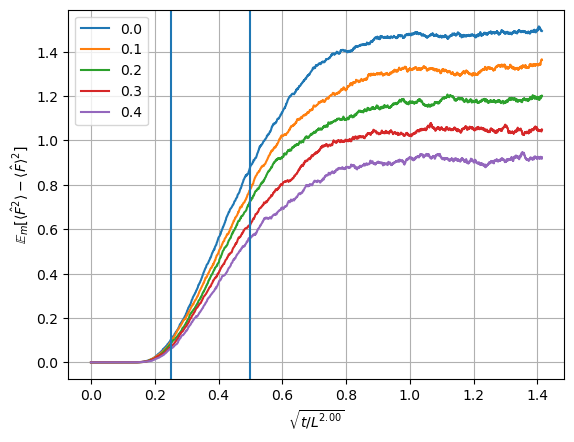

In [202]:
fig,ax=plt.subplots()

for p_proj in p_proj_list[:5]:
    ax.plot(tL[p_proj],mean_var_DW[p_proj],label=p_proj)
ax.legend()
ax.grid('on')
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')
ax.axvline(x=0.25)
ax.axvline(x=0.5)

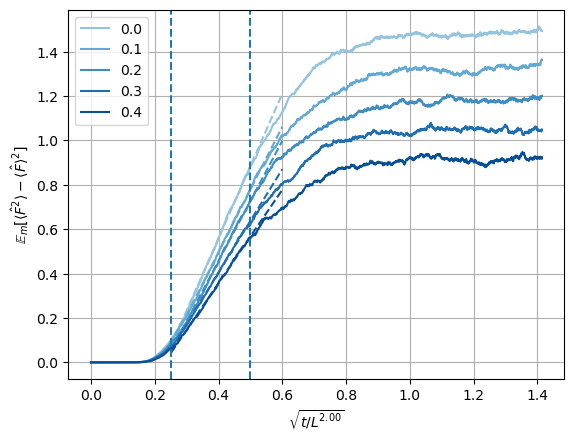

In [221]:
fig,ax=plt.subplots()
colormap = (plt.cm.Blues(0.4+0.6*(i/5)) for i in range(5))
for p_proj in p_proj_list[:5]:
    color=next(colormap)
    ax.plot(tL[p_proj],mean_var_DW[p_proj],label=p_proj,color=color)
    tL_small, mean_var_DW_small, res=fit_slope(tL,mean_var_DW,p_proj,max_=0.5,min_=0.25)
    tL_small=np.linspace(tL_small[0],.6)
    ax.plot(tL_small,res.slope*tL_small+res.intercept,'--',color=color)
ax.legend()
ax.grid('on')
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')
ax.axvline(x=0.25,ls='dashed')
ax.axvline(x=0.5,ls='dashed')

## Extract "Diffusion Constant" $mean(var(F))\sim D \sqrt{t}/L$

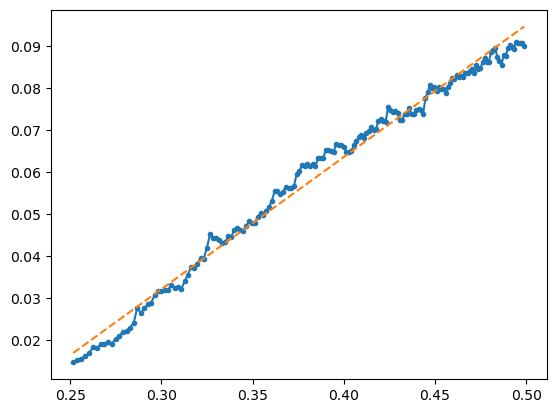

In [197]:
p_proj=p_proj_list[9]
tL_small, mean_var_DW_small, res=fit_slope(tL,mean_var_DW,p_proj,max_=0.5,min_=0.25)
plt.plot(tL_small,mean_var_DW_small,'.-')
plt.plot(tL_small,res.slope*tL_small+res.intercept,'--')

In [198]:
DW_D=[fit_slope(tL,mean_var_DW,p_proj)[2].slope for p_proj in p_proj_list]

Text(0, 0.5, '$D_{DW}$')

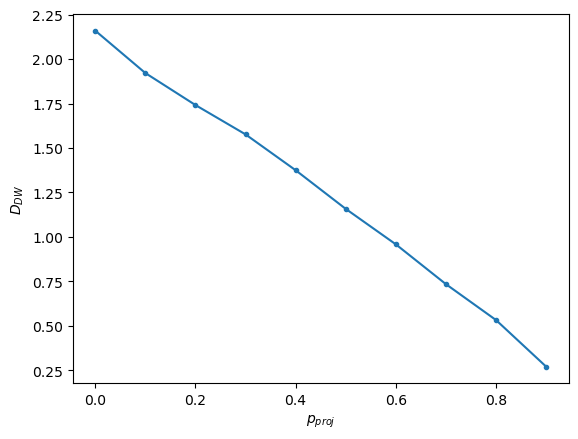

In [200]:
fig,ax=plt.subplots()
ax.plot(p_proj_list,DW_D,'.-')
ax.set_xlabel('$p_{proj}$')
ax.set_ylabel(r'$D_{DW}$')

## Satruate value vs p_proj

In [203]:
df_minimal_DW1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='L',key=30)
df_minimal_DW2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='L',key=30)

In [204]:
T_min,T_max=int(L**z),-1

sat_mean_var_DW=[]
for p_proj in p_proj_list:
    data1=df_minimal_DW1.xs(level='p_proj',key=p_proj)['observations']
    t_list=data1.index
    data1=np.vstack((data1).values)
    data2=df_minimal_DW2.xs(level='p_proj',key=p_proj)['observations']
    data2=np.vstack((data2).values)
    var_data=(data2-data1**2)
    sat_mean_var_DW.append(var_data[T_min:T_max,:].mean())

Text(0, 0.5, '$\\mathbb{E}_m[\\langle\\hat{F}^2\\rangle-\\langle\\hat{F}\\rangle^2] (t\\rightarrow\\infty)$')

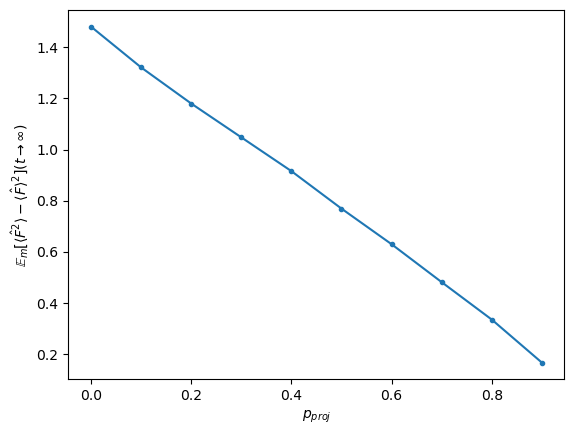

In [205]:
fig,ax=plt.subplots()
ax.plot(p_proj_list,sat_mean_var_DW,'.-')
ax.set_xlabel('$p_{proj}$')
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2] (t\rightarrow\infty)$')


## Ratio as a function of p_proj

Text(0, 0.5, '$D/D_DW$')

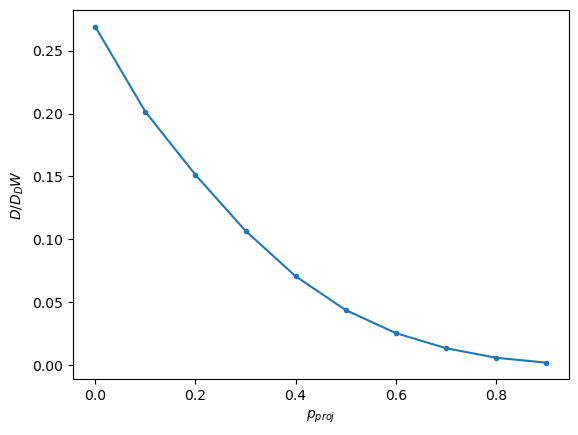

In [209]:
fig,ax=plt.subplots()
ax.plot(p_proj_list,np.array(EE_D)/np.array(DW_D),'.-')
ax.set_xlabel('$p_{proj}$')
ax.set_ylabel(r'$D/D_DW$')

In [ ]:

# tar_gz_path = '/home/jake/Data/Metrics/MPS_0-1_T.tar.gz'
zip_path = '/home/jake/Data/Metrics/MPS_0-1_T.zip'

In [9]:
import tarfile
import zipfile


In [25]:
import orjson

In [17]:
zipf=zipfile.ZipFile(zip_path, 'r')

In [27]:
fn=(zipf.namelist())

In [28]:
orjson.loads(zipf.open(fn[0]).read())

{'args': {'p_ctrl': 0.5, 'L': 30, 'p_proj': 0.4, 'seed': 3151},
 'EE': [0.0,
  0.0,
  -4.440892098500627e-16,
  6.661338147750936e-16,
  2.2204460492503126e-16,
  -4.440892098500627e-16,
  -4.440892098500627e-16,
  -1.3322676295501888e-15,
  -8.881784197001256e-16,
  -4.440892098500627e-16,
  -8.881784197001256e-16,
  -8.881784197001256e-16,
  -1.776356839400252e-15,
  -1.776356839400252e-15,
  1.7763568394002489e-15,
  1.332267629550187e-15,
  -1.3322676295501888e-15,
  2.2204460492503126e-16,
  -1.3322676295501888e-15,
  0.0,
  -2.2204460492503154e-15,
  0.0,
  -8.881784197001256e-16,
  2.2204460492503126e-16,
  2.2204460492503126e-16,
  1.554312234475218e-15,
  -1.3322676295501888e-15,
  1.9984014443252798e-15,
  -4.440892098500627e-16,
  1.332267629550187e-15,
  1.7763568394002489e-15,
  0.0,
  -8.881784197001256e-16,
  -4.440892098500627e-16,
  0.0,
  -4.440892098500627e-16,
  -4.440892098500627e-16,
  -4.440892098500627e-16,
  4.440892098500625e-16,
  0.13205838062770586,
  6.661

In [3]:
tar=tarfile.open(tar_gz_path, 'r:gz')

In [6]:
z=tar.extractfile('./filelist.txt').read()

In [7]:
z=tar.extractfile('./MPS_(0,1)_L30_pctrl0.500_pproj0.500_s534_T.json')

In [ ]:
import zipfile


In [ ]:
witMPS_(0,1)_L30_pctrl0.500_pproj0.500_s534_T.js

In [42]:
b'MPS' in z

True

In [45]:
set([x[2:] for x in z.decode('utf-8').splitlines()])

{'MPS_(0,1)_L30_pctrl0.500_pproj0.500_s534_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.300_s9559_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.600_s8154_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.900_s6159_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.100_s2685_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.000_s3905_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.400_s3544_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.600_s988_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.000_s9595_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.800_s6368_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.500_s5971_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.300_s809_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.100_s5395_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.100_s8059_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.900_s4787_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.200_s1314_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.500_s7308_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.700_s7901_T.json',
 'MPS_(0,1)_L30_pctrl0.500_pproj0.100_s9232_T.jso

In [40]:
'MPS'

b'./filelist.txt\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s44_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s279_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s332_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s243_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s237_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s318_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s67_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s219_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s320_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s112_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s351_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s348_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s9_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s347_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s321_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s29_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s33_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s344_T.json\n./MPS_(0,1)_L30_pctrl0.500_pproj0.000_s42_T.json\n./MPS_(0,1)_L30_pctr

In [32]:
z=tar.getnames()

In [33]:
z[1]

'2.sh'

In [24]:
zz=orjson.loads(tar.extractfile(z[1]).read())

In [25]:
zz

{'args': {'p_ctrl': 0.5, 'L': 30, 'p_proj': 0.4, 'seed': 3151},
 'EE': [0.0,
  0.0,
  -4.440892098500627e-16,
  6.661338147750936e-16,
  2.2204460492503126e-16,
  -4.440892098500627e-16,
  -4.440892098500627e-16,
  -1.3322676295501888e-15,
  -8.881784197001256e-16,
  -4.440892098500627e-16,
  -8.881784197001256e-16,
  -8.881784197001256e-16,
  -1.776356839400252e-15,
  -1.776356839400252e-15,
  1.7763568394002489e-15,
  1.332267629550187e-15,
  -1.3322676295501888e-15,
  2.2204460492503126e-16,
  -1.3322676295501888e-15,
  0.0,
  -2.2204460492503154e-15,
  0.0,
  -8.881784197001256e-16,
  2.2204460492503126e-16,
  2.2204460492503126e-16,
  1.554312234475218e-15,
  -1.3322676295501888e-15,
  1.9984014443252798e-15,
  -4.440892098500627e-16,
  1.332267629550187e-15,
  1.7763568394002489e-15,
  0.0,
  -8.881784197001256e-16,
  -4.440892098500627e-16,
  0.0,
  -4.440892098500627e-16,
  -4.440892098500627e-16,
  -4.440892098500627e-16,
  4.440892098500625e-16,
  0.13205838062770586,
  6.661

In [21]:
z

['MPS_0-1_T',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.400_s3151_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.500_s6595_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.400_s4693_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.900_s8645_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.200_s4347_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.500_s7538_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.400_s9494_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.200_s7263_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.600_s8889_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.700_s920_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.500_s7761_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.200_s3586_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.600_s1250_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.000_s5649_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.900_s4200_T.json',
 'MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj

In [ ]:
with  as tar:
